<a href="https://colab.research.google.com/github/saish23/Deep-Learning-Projects-/blob/main/MultiClass_Classification_using_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [38]:
x_train.shape

(60000, 28, 28)

In [39]:
y_train.shape

(60000,)

In [40]:
x_test.shape

(10000, 28, 28)

In [41]:
y_test.shape

(10000,)

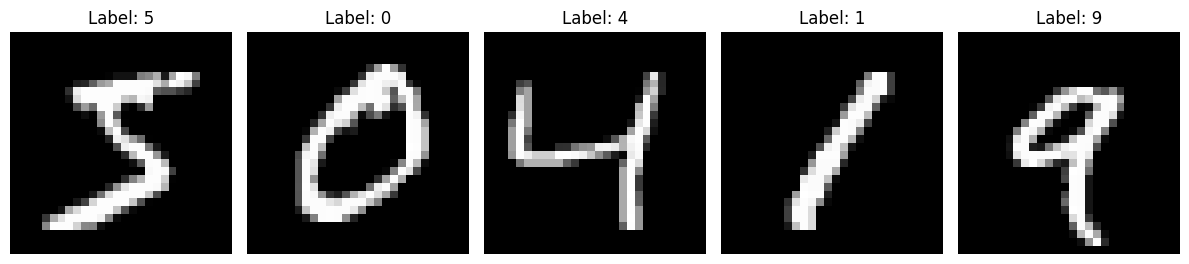

In [42]:
# Visualize sample images

import matplotlib.pyplot as plt

num_samples = 5  # Number of sample images to display

plt.figure(figsize=(12, 5))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [43]:
# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the model
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [44]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


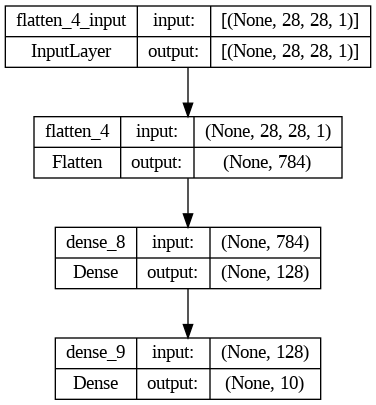

In [45]:
plot_model(model,show_shapes=True)

In [48]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0140 - accuracy: 0.9954 - val_loss: 0.0958 - val_accuracy: 0.9753
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0117 - accuracy: 0.9961 - val_loss: 0.1074 - val_accuracy: 0.9741
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0089 - accuracy: 0.9972 - val_loss: 0.0918 - val_accuracy: 0.9797
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0090 - accuracy: 0.9973 - val_loss: 0.0905 - val_accuracy: 0.9789
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0077 - accuracy: 0.9974 - val_loss: 0.0940 - val_accuracy: 0.9796
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0063 - accuracy: 0.9981 - val_loss: 0.1005 - val_accuracy: 0.9773
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0075 - accuracy: 0.9977 - val_loss: 0.1040 - val_accuracy

In [49]:
history.history

{'loss': [0.01395803689956665,
  0.011703128926455975,
  0.008890923112630844,
  0.009013453498482704,
  0.007733437232673168,
  0.006326891016215086,
  0.007493593730032444,
  0.0038804681971669197,
  0.006937754340469837,
  0.0031411126255989075],
 'accuracy': [0.9953666925430298,
  0.996066689491272,
  0.9971500039100647,
  0.9972666501998901,
  0.9973833560943604,
  0.9980999827384949,
  0.9976500272750854,
  0.9987833499908447,
  0.9979333281517029,
  0.9992333054542542],
 'val_loss': [0.09581191092729568,
  0.10743087530136108,
  0.09177377074956894,
  0.09047020226716995,
  0.09398872405290604,
  0.10046224296092987,
  0.10404670238494873,
  0.10627713799476624,
  0.10577572882175446,
  0.10397341102361679],
 'val_accuracy': [0.9753000140190125,
  0.9740999937057495,
  0.9797000288963318,
  0.9789000153541565,
  0.9796000123023987,
  0.9772999882698059,
  0.9789999723434448,
  0.9785000085830688,
  0.9796000123023987,
  0.9789999723434448]}

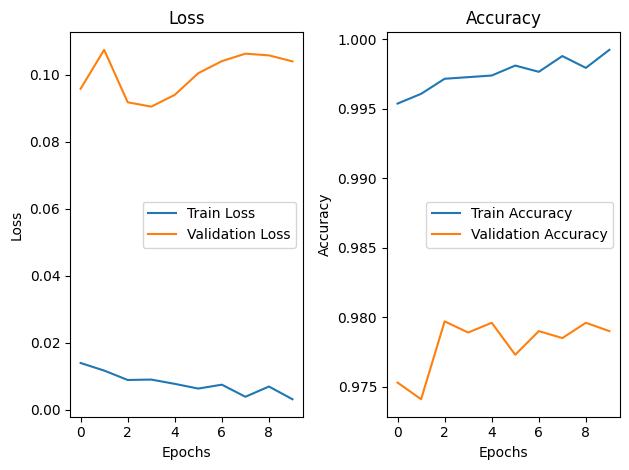

In [50]:
# Plot train loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot train accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

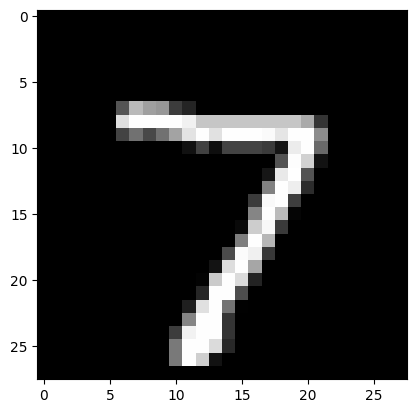

In [52]:
plt.imshow(x_test[0], cmap = 'gray')

In [53]:
x_test[0].shape

(28, 28, 1)

In [55]:
import numpy as np

x = np.reshape(x_test[0], (1,28,28))
np.argmax(model.predict(x))

1/1 [==============================] - 0s 173ms/step


7

In [56]:
model.predict(x)

1/1 [==============================] - 0s 76ms/step


array([[1.3810126e-11, 5.3954952e-18, 2.9730836e-11, 7.3070999e-10,
        1.5061306e-19, 7.2405291e-15, 3.9138810e-21, 1.0000000e+00,
        7.4925194e-14, 7.1223138e-10]], dtype=float32)